In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

<AxesSubplot:xlabel='Cabin'>

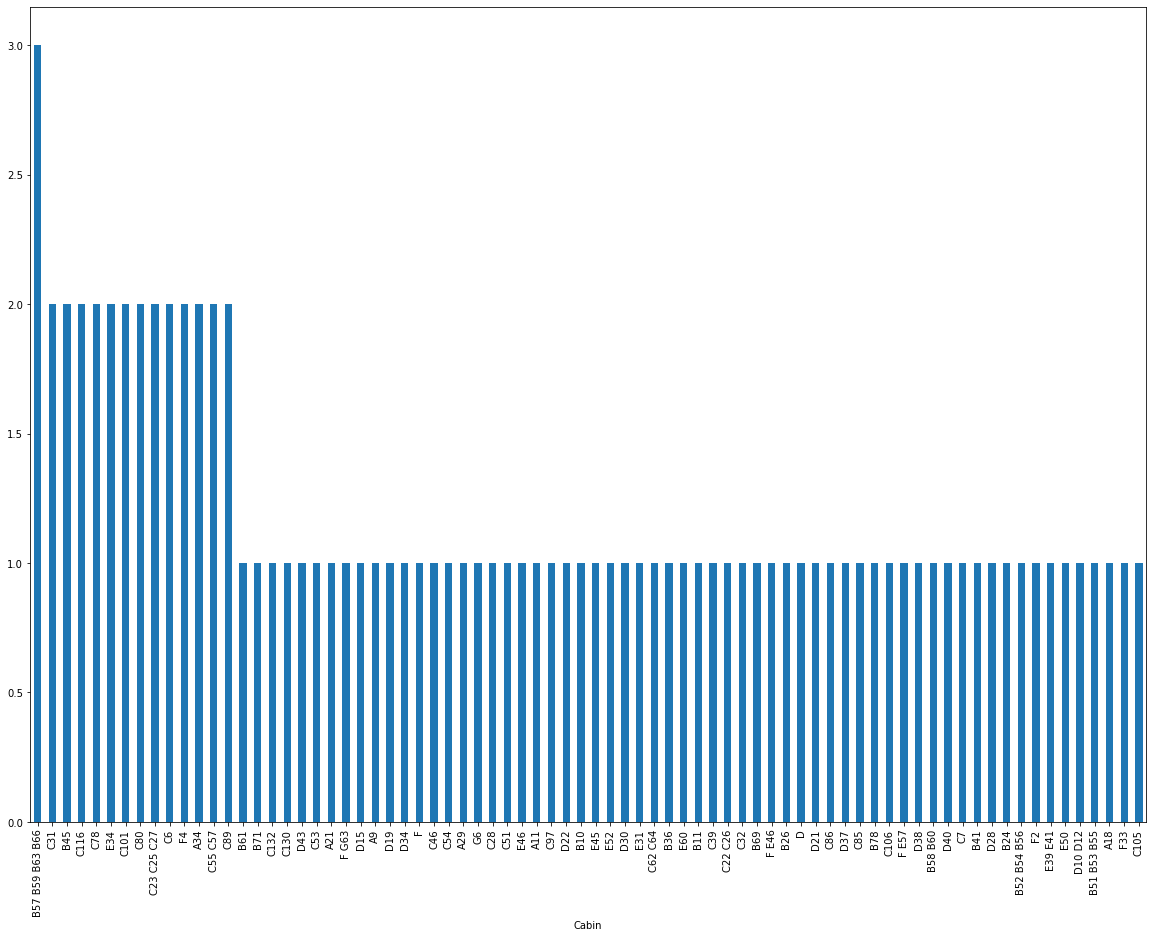

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
df['Cabin'].value_counts().sort_values(ascending=False).plot.bar()

Text(0.5, 1.0, 'Cabin graph')

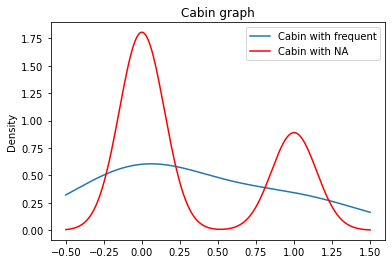

In [8]:
fig =plt.figure()
ax = fig.add_subplot(111)

df[df['Cabin'] == 'B57 B59 B63 B66']['Survived'].plot(kind='kde',ax=ax)

df[df['Cabin'].isnull()]['Survived'].plot(kind='kde',ax=ax,color='red')
lines,label = ax.get_legend_handles_labels()
label = ['Cabin with frequent','Cabin with NA']
ax.legend(lines,label,loc='best')
plt.title("Cabin graph")

In [9]:
df['Cabin'].fillna('missing',inplace=True)

<AxesSubplot:xlabel='Cabin'>

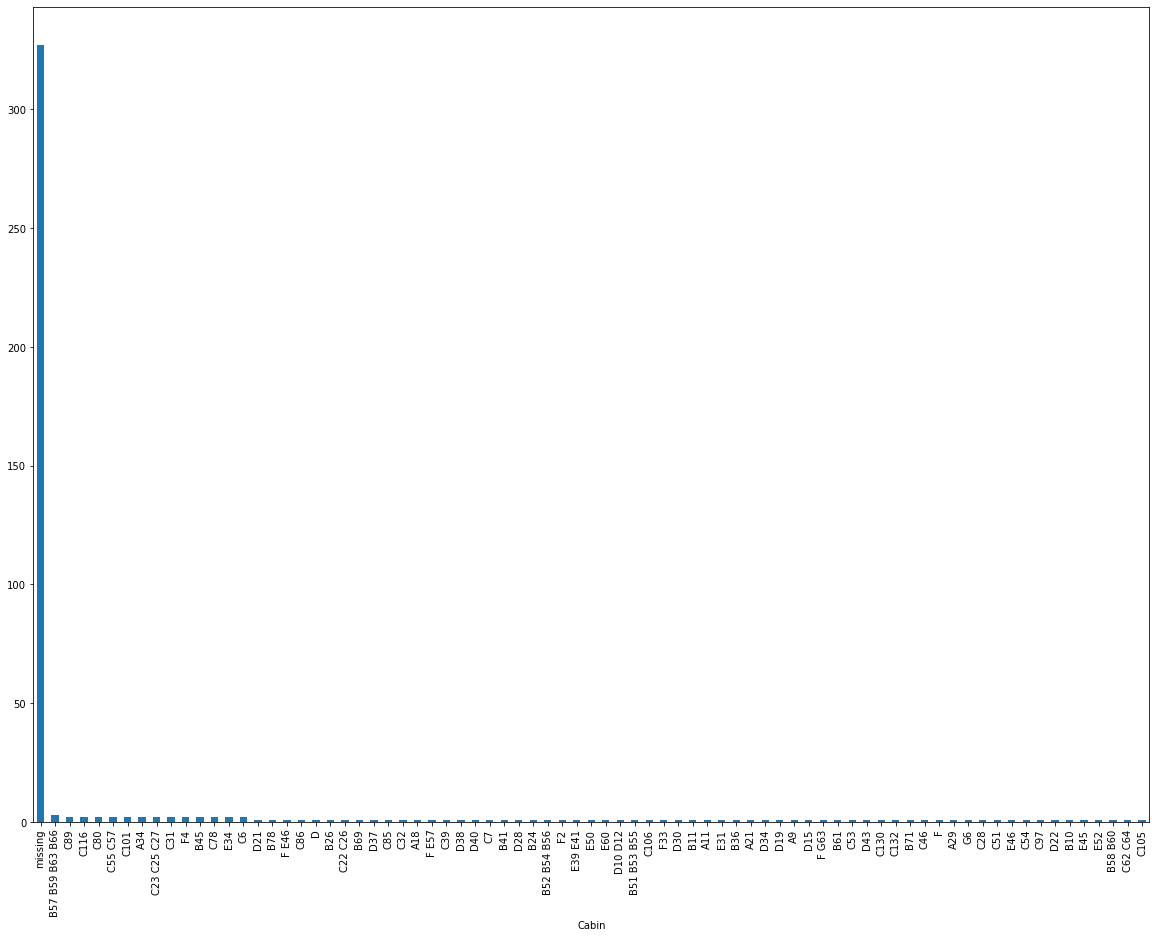

In [10]:
plt.figure(figsize=(20,15))
df['Cabin'].value_counts().plot(kind='bar')

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant',fill_value='Missing')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Missing', 'Missing', 'Missing', 'Missing', 'Missing', 'Missing',
       'Missing', 'Missing', 'Missing', 'Missing', 'Missing'],
      dtype=object)